In [1]:
import pandas as pd
import csv

### **Loading Data**

In [2]:
tweets_2020 = pd.read_csv('/content/drive/MyDrive/datalongcovid/lc2020.csv', encoding='unicode_escape')

In [3]:
tweets_2021 = pd.read_csv('/content/drive/MyDrive/datalongcovid/lc2021.csv')

In [4]:
tweets_2022 = pd.read_csv('/content/drive/MyDrive/datalongcovid/lc2022.csv')

In [5]:
tweets_2020.head()

,Date,User,Tweets
0,2020-04-01 00:23:31+00:00,Jennyjen_k,March was 367 days long. We are now finally em...
1,2020-04-01 01:25:41+00:00,flowers197624,I never seen nothing made in China last so lon...
2,2020-04-01 01:26:29+00:00,Rcarvz,@stoolpresidente I wonder how long Covid lives...
3,2020-04-01 01:38:13+00:00,NaniWaialeale,Many have wondered how long COVID-19 lasts on ...
4,2020-04-01 02:43:35+00:00,graymaxwell1,@realDonaldTrump Pre-existing issues caused my...


### **Preprocessing data**



In [6]:
tweets_2020.drop("User", axis=1, inplace=True)
tweets_2020.drop("Date", axis=1, inplace=True)

tweets_2021.drop("User", axis=1, inplace=True)
tweets_2021.drop("Date", axis=1, inplace=True)

tweets_2022.drop("User", axis=1, inplace=True)
tweets_2022.drop("Date", axis=1, inplace=True)

In [7]:
print(tweets_2020.count())
print(tweets_2021.count())
print(tweets_2022.count())
print(tweets_2020.count() + tweets_2021.count() + tweets_2022.count())

Tweets    158280
dtype: int64
Tweets    823426
dtype: int64
Tweets    1465846
dtype: int64
Tweets    2447552
dtype: int64


In [107]:
merged_tweets = pd.concat([tweets_2020, tweets_2021, tweets_2022], ignore_index=True)

In [108]:
merged_tweets.count()

Tweets    2447552
dtype: int64

In [109]:
merged_tweets.drop_duplicates(subset='Tweets', keep='first', inplace=True)

In [111]:
merged_tweets = merged_tweets.dropna()

In [112]:
merged_tweets.count()

Tweets    2191047
dtype: int64

In [113]:
merged_tweets.head()

,Tweets
0,"March was 367 days long. We are now finally embarking on April which will be 3,670 days long. #Covid_19"
1,I never seen nothing made in China last so long #Covid-19\n\nThey definitely took their time with this one cause they had a plan????\n\nThen again are we sure it was made in China?\n\nYet the world bought their test kits. I am sure they were cheap.
2,@stoolpresidente I wonder how long Covid lives on car windows for?
3,Many have wondered how long COVID-19 lasts on surfaces. Preliminary research shows that the coronavirus could live for up to:\n\n?? 3 hours in the air\n?? 4 hours on copper\n?? 24 hours on cardboard\n?? 3 days on plastic and stainless steel
4,"@realDonaldTrump Pre-existing issues caused my mother to take turn for worse,needs round the clock care. Failure to act let the virus get out of control. Now choice is give up my job to care for her or send her to facility where I can??t visit for months. She won??t live that long. #COVID-19"


In [118]:
# selected_rows = merged_tweets.iloc[:10000]
selected_rows = merged_tweets.sample(n=10000, random_state=41)

In [119]:
selected_rows.head()

,Tweets
1763923,"@BallouxFrancois @andrew_croxford @GYamey @BillHanage The key point remains the presence of any viral product correlating with long covid: it's a strong, objective suggestion of persistent infection somewhere. And also makes long covid more objective, for the doubters."
1140066,"Holly my daughter &amp; Tobie. Holly, who has had Long Covid for 21 months, had a good Christmas, only needing a few rests, which was so much better than a year ago. Small steps, but going in the right direction. My biggest New Year wish is that she get well again. #writingcommunity https://t.co/dnYYxNUFmP"
2437459,"Long COVID could be keeping as many as 4 million Americans out of the workforce, according to a new estimate from the Brookings Institute.\n\n https://t.co/AEfn1ljRiG"
2402437,Long #COVID: Slow progress for patients in #Germany \n\nhttps://t.co/QU0ZbrPo5T
2360595,"""It's because of long covid""\n- The Rona Cult https://t.co/wF0FeFDXQW"


In [120]:
def replace_username(word):
    if word.startswith('@'):
        return '@user'
    else:
        return word

selected_rows['Tweets'] = selected_rows['Tweets'].apply(lambda tweet: ' '.join(map(replace_username, tweet.split())))

In [121]:
import re

def remove_starting_username(tweet):
    return re.sub(r'^\s*(@user\s*)+', '', tweet)

selected_rows['Tweets'] = selected_rows['Tweets'].apply(remove_starting_username)

In [122]:
selected_rows.head()

,Tweets
1763923,"The key point remains the presence of any viral product correlating with long covid: it's a strong, objective suggestion of persistent infection somewhere. And also makes long covid more objective, for the doubters."
1140066,"Holly my daughter &amp; Tobie. Holly, who has had Long Covid for 21 months, had a good Christmas, only needing a few rests, which was so much better than a year ago. Small steps, but going in the right direction. My biggest New Year wish is that she get well again. #writingcommunity https://t.co/dnYYxNUFmP"
2437459,"Long COVID could be keeping as many as 4 million Americans out of the workforce, according to a new estimate from the Brookings Institute. https://t.co/AEfn1ljRiG"
2402437,Long #COVID: Slow progress for patients in #Germany https://t.co/QU0ZbrPo5T
2360595,"""It's because of long covid"" - The Rona Cult https://t.co/wF0FeFDXQW"


In [123]:
copy_for_pretrained_model = selected_rows
copy_for_textblob = selected_rows
copy_for_pretrained_model.head()

,Tweets
1763923,"The key point remains the presence of any viral product correlating with long covid: it's a strong, objective suggestion of persistent infection somewhere. And also makes long covid more objective, for the doubters."
1140066,"Holly my daughter &amp; Tobie. Holly, who has had Long Covid for 21 months, had a good Christmas, only needing a few rests, which was so much better than a year ago. Small steps, but going in the right direction. My biggest New Year wish is that she get well again. #writingcommunity https://t.co/dnYYxNUFmP"
2437459,"Long COVID could be keeping as many as 4 million Americans out of the workforce, according to a new estimate from the Brookings Institute. https://t.co/AEfn1ljRiG"
2402437,Long #COVID: Slow progress for patients in #Germany https://t.co/QU0ZbrPo5T
2360595,"""It's because of long covid"" - The Rona Cult https://t.co/wF0FeFDXQW"


### **Sentiment analysis with pretrained model**

In [19]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.4 MB/s eta 0:00:00


In [20]:
import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [21]:
model_name = 'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [23]:
sentiment_labels = ["Negative", "Neutral", "Positive"]

In [124]:
results = []
for index, row in copy_for_pretrained_model.iterrows():
    tweet = row['Tweets']
    inputs = tokenizer(tweet, return_tensors='pt', truncation=True, padding=True)
    outputs = model(**inputs)
    sentiment_scores = outputs.logits
    sentiment_probs = torch.softmax(sentiment_scores, dim=1).detach().numpy()[0]
    sentiment_label = sentiment_labels[sentiment_probs.argmax()]
    results.append(sentiment_label)
copy_for_pretrained_model['sentiment'] = results

In [125]:
copy_for_pretrained_model.head(10)

,Tweets,sentiment
1763923,"The key point remains the presence of any viral product correlating with long covid: it's a strong, objective suggestion of persistent infection somewhere. And also makes long covid more objective, for the doubters.",Neutral
1140066,"Holly my daughter &amp; Tobie. Holly, who has had Long Covid for 21 months, had a good Christmas, only needing a few rests, which was so much better than a year ago. Small steps, but going in the right direction. My biggest New Year wish is that she get well again. #writingcommunity https://t.co/dnYYxNUFmP",Positive
2437459,"Long COVID could be keeping as many as 4 million Americans out of the workforce, according to a new estimate from the Brookings Institute. https://t.co/AEfn1ljRiG",Neutral
2402437,Long #COVID: Slow progress for patients in #Germany https://t.co/QU0ZbrPo5T,Neutral
2360595,"""It's because of long covid"" - The Rona Cult https://t.co/wF0FeFDXQW",Neutral
53215,"Yes, it does, and that doesn't even show all the people with longcovid yet (an estimated 150.000), and it obviously isn't over yet. And before you start: No, I don't wanna see your statistical acrobatics to explain away that bump. https://t.co/nv0wf0Mf5x",Negative
1739317,"#LongCovid can affect children of all ages, including infants, study shows https://t.co/RzPhiLDGMr",Negative
536917,"“Safe”, except for the ones who get sick, suffer long covid or “succumb”? Safe seems an odd choice of language…",Negative
828932,Just putting this out there....LC @user https://t.co/pClLbd0AtT,Neutral
514330,"That's a very simplistic view of it since they're are all kinds of other issues, like long COVID. I'm order to look at it this way, you should take into account all the other issues. https://t.co/2PJNsfhoMh",Neutral


In [126]:
sentiment_counts_pretrained_model = copy_for_pretrained_model.groupby(['sentiment']).size()

<Axes: >

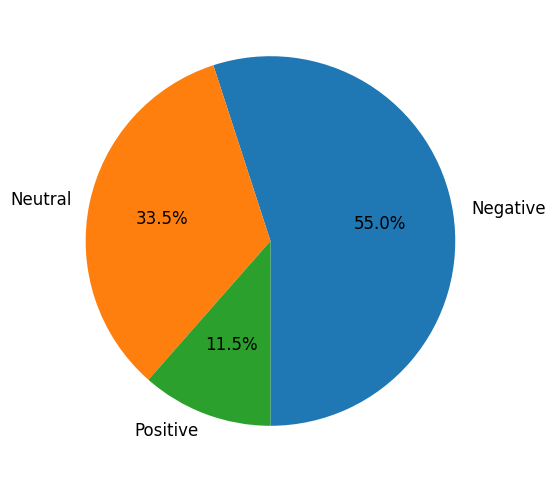

In [127]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts_pretrained_model.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

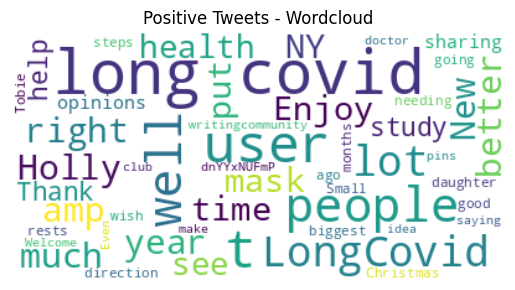

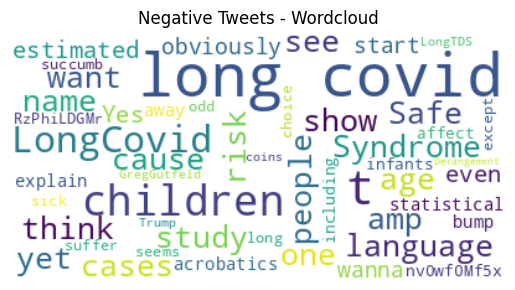

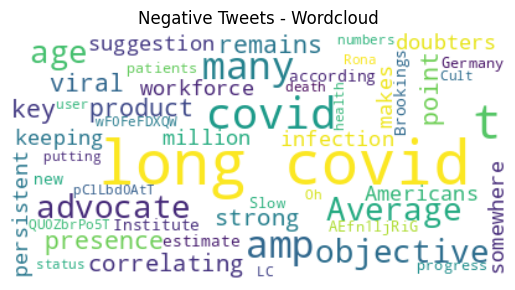

In [133]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

positive_tweets_pretrained_mdoel = copy_for_pretrained_model['Tweets'][copy_for_pretrained_model["sentiment"] == 'Positive']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(positive_tweets_pretrained_mdoel))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

negative_tweets_pretrained_mdoel = copy_for_pretrained_model['Tweets'][copy_for_pretrained_model["sentiment"] == 'Negative']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(negative_tweets_pretrained_mdoel))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

neutral_tweets_pretrained_mdoel = copy_for_pretrained_model['Tweets'][copy_for_pretrained_model["sentiment"] == 'Neutral']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(neutral_tweets_pretrained_mdoel))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### **Sentiment analysis with textblob**

In [18]:
!pip install textblob

In [60]:
from textblob import TextBlob

In [134]:
tweets_with_sentiment = pd.DataFrame(columns=['tweet', 'sentiment'])

for index, row in copy_for_textblob.iterrows():
    tweet_text = row['Tweets']
    blob = TextBlob(tweet_text)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        polarity_str = "Positive"
    elif polarity < 0:
        polarity_str = "Negative"
    else:
        polarity_str = "Neutral"

    tweets_with_sentiment = tweets_with_sentiment.append({'tweet': tweet_text, 'sentiment': polarity_str}, ignore_index=True)

tweets_with_sentiment.head(10)

Streaming output truncated to the last 5000 lines.
<ipython-input-134-6a070bfca500>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_with_sentiment = tweets_with_sentiment.append({'tweet': tweet_text, 'sentiment': polarity_str}, ignore_index=True)
<ipython-input-134-6a070bfca500>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_with_sentiment = tweets_with_sentiment.append({'tweet': tweet_text, 'sentiment': polarity_str}, ignore_index=True)
<ipython-input-134-6a070bfca500>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_with_sentiment = tweets_with_sentiment.append({'tweet': tweet_text, 'sentiment': polarity_str}, ignore_index=True)
<ipython-input-134-6a070bfca500>:15: FutureWarning: The frame.appen

,tweet,sentiment
0,"The key point remains the presence of any viral product correlating with long covid: it's a strong, objective suggestion of persistent infection somewhere. And also makes long covid more objective, for the doubters.",Positive
1,"Holly my daughter &amp; Tobie. Holly, who has had Long Covid for 21 months, had a good Christmas, only needing a few rests, which was so much better than a year ago. Small steps, but going in the right direction. My biggest New Year wish is that she get well again. #writingcommunity https://t.co/dnYYxNUFmP",Positive
2,"Long COVID could be keeping as many as 4 million Americans out of the workforce, according to a new estimate from the Brookings Institute. https://t.co/AEfn1ljRiG",Positive
3,Long #COVID: Slow progress for patients in #Germany https://t.co/QU0ZbrPo5T,Negative
4,"""It's because of long covid"" - The Rona Cult https://t.co/wF0FeFDXQW",Negative
5,"Yes, it does, and that doesn't even show all the people with longcovid yet (an estimated 150.000), and it obviously isn't over yet. And before you start: No, I don't wanna see your statistical acrobatics to explain away that bump. https://t.co/nv0wf0Mf5x",Neutral
6,"#LongCovid can affect children of all ages, including infants, study shows https://t.co/RzPhiLDGMr",Neutral
7,"“Safe”, except for the ones who get sick, suffer long covid or “succumb”? Safe seems an odd choice of language…",Positive
8,Just putting this out there....LC @user https://t.co/pClLbd0AtT,Neutral
9,"That's a very simplistic view of it since they're are all kinds of other issues, like long COVID. I'm order to look at it this way, you should take into account all the other issues. https://t.co/2PJNsfhoMh",Negative


In [135]:
pd.set_option('max_colwidth', None)
pd.set_option('display.width', 3000)
tweets_with_sentiment = pd.DataFrame(tweets_with_sentiment)

display(tweets_with_sentiment[tweets_with_sentiment["sentiment"] == 'Positive'].head(1))
display(tweets_with_sentiment[tweets_with_sentiment["sentiment"] == 'Neutral'].head(1))
display(tweets_with_sentiment[tweets_with_sentiment["sentiment"] == 'Negative'].head(1))

,tweet,sentiment
0,"The key point remains the presence of any viral product correlating with long covid: it's a strong, objective suggestion of persistent infection somewhere. And also makes long covid more objective, for the doubters.",Positive


,tweet,sentiment
5,"Yes, it does, and that doesn't even show all the people with longcovid yet (an estimated 150.000), and it obviously isn't over yet. And before you start: No, I don't wanna see your statistical acrobatics to explain away that bump. https://t.co/nv0wf0Mf5x",Neutral


,tweet,sentiment
3,Long #COVID: Slow progress for patients in #Germany https://t.co/QU0ZbrPo5T,Negative


In [136]:
sentiment_counts_textblob = tweets_with_sentiment.groupby(['sentiment']).size()
print(sentiment_counts_textblob)

sentiment
Negative    4457
Neutral      675
Positive    4868
dtype: int64


<Axes: >

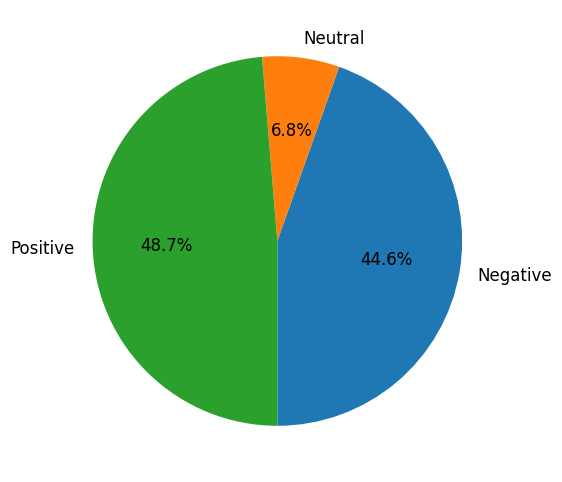

In [137]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts_textblob.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

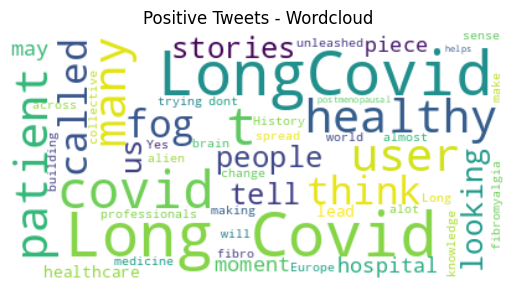

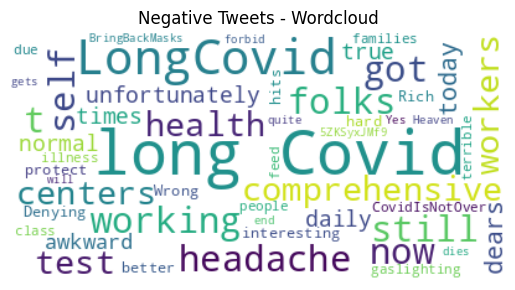

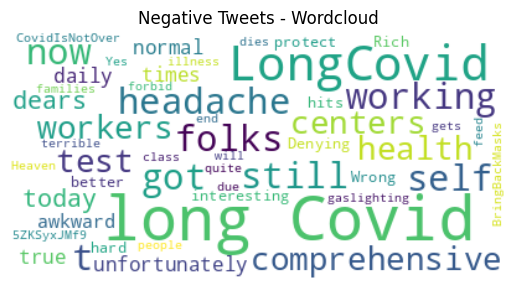

In [66]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

positive_tweets = tweets_with_sentiment['tweet'][tweets_with_sentiment["sentiment"] == 'Positive']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

negative_tweets = tweets_with_sentiment['tweet'][tweets_with_sentiment["sentiment"] == 'Negative']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

neutral_tweets = tweets_with_sentiment['tweet'][tweets_with_sentiment["sentiment"] == 'Neutral']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### **Compare textblob with pretrained model**

In [138]:
print("Pretrained model: \n")
print(sentiment_counts_pretrained_model)
print("\nTextblob: \n")
print(sentiment_counts_textblob)

Pretrained model: 

sentiment
Negative    5500
Neutral     3352
Positive    1148
dtype: int64

Textblob: 

sentiment
Negative    4457
Neutral      675
Positive    4868
dtype: int64


<Axes: >

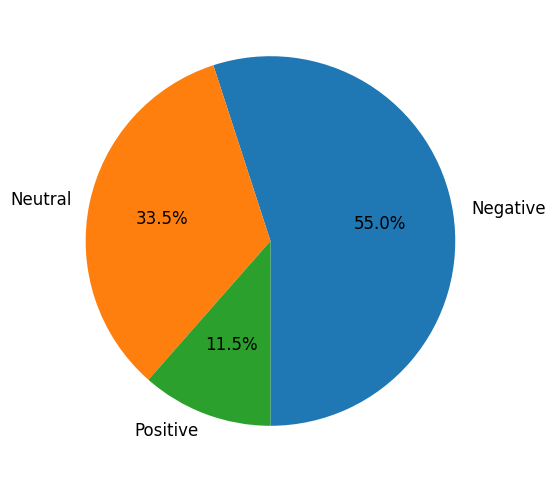

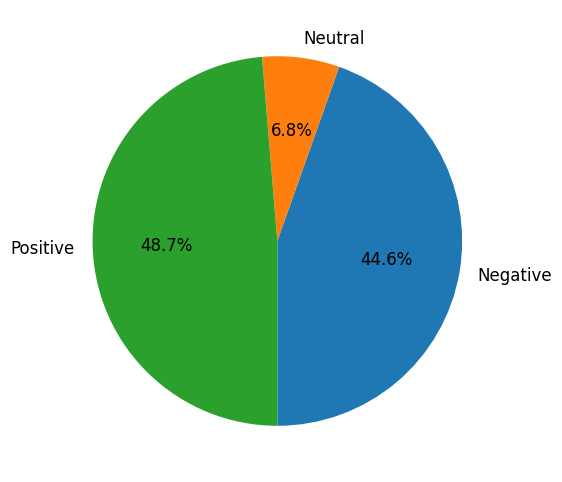

In [139]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts_pretrained_model.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts_textblob.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")